In [712]:
import numpy as np
import pandas as pd

In [713]:
df_bank = pd.read_csv('bank-full.csv')

In [714]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# 1.1 Univariate Analysis

In [715]:
df_bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [716]:
df_bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [717]:
df_bank.shape

(45211, 17)

Analyse Missing Values

In [718]:
df_bank[df_bank.isnull().any(axis = 1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


There are no null values in the dataframe

In [719]:
df_bank[df_bank.isna().any(axis=1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


There are no NAN values in the dataframe

In [720]:
df_bank.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Target'],
      dtype='object')

In [721]:
print('\njob:') 
print(df_bank.job.unique())
print('\nmarital status:')
print(df_bank.marital.unique())
print('\neducation:')
print(df_bank.education.unique())
print('\ndefault:')
print(df_bank.default.unique())
print('\nhousing:')
print(df_bank.housing.unique())
print('\nloan:')
print(df_bank.loan.unique())
print('\ncontact:')
print(df_bank.contact.unique())
print('\nmonth:')
print(df_bank.month.unique())
print('\npoutcome:')
print(df_bank.poutcome.unique())
print('\nTarget:')
print(df_bank['Target'].unique())


job:
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

marital status:
['married' 'single' 'divorced']

education:
['tertiary' 'secondary' 'unknown' 'primary']

default:
['no' 'yes']

housing:
['yes' 'no']

loan:
['no' 'yes']

contact:
['unknown' 'cellular' 'telephone']

month:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

poutcome:
['unknown' 'failure' 'other' 'success']

Target:
['no' 'yes']


In [722]:
print(df_bank.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')


# 1.2 Multivariate Analysis 

In [723]:
import matplotlib.pyplot as plt
import seaborn as sns
import dexplot as dxp

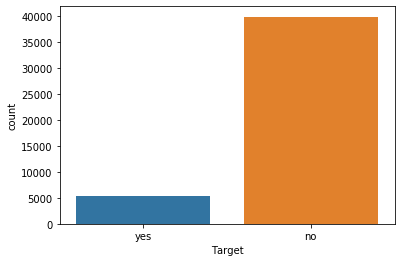

In [724]:
sns.countplot(df_bank.Target,order = ['yes', 'no'])

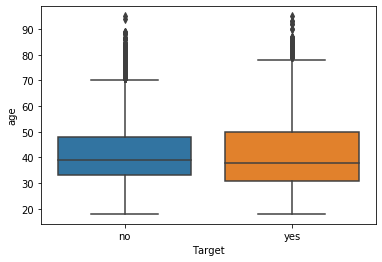

In [725]:
sns.boxplot(x='Target', y='age',data = df_bank)

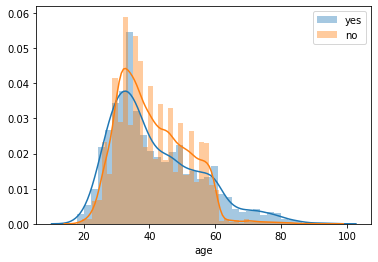

In [726]:
target_y = df_bank.loc[df_bank['Target']== 'yes']
target_n = df_bank.loc[df_bank['Target'] == 'no']
sns.distplot(target_y['age'], label = 'yes')
sns.distplot(target_n['age'], label = 'no')
plt.legend()

There doesn't seem to be too much of a correlation between 'Age' and 'Target' variables

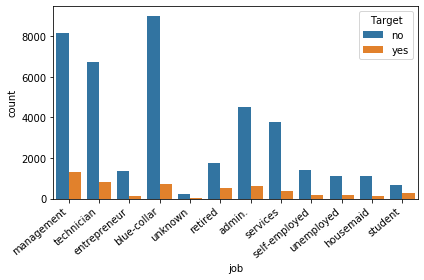

In [727]:
ax = sns.countplot(x='job', data = df_bank, hue='Target', orient ='h')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()


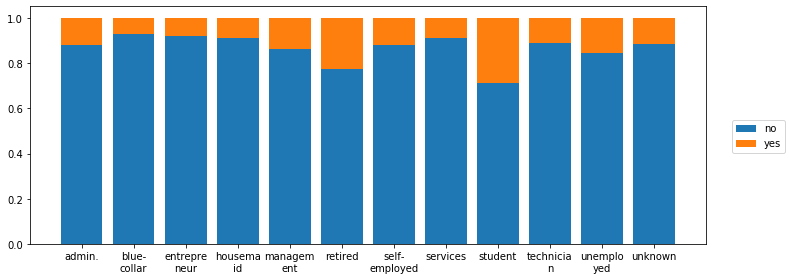

In [728]:
dxp.aggplot(agg = 'job', data = df_bank, hue='Target', normalize ='job', stacked = True,figsize = (10,4))

there is a potential correlation between 'job' and 'target' variable with students, retired and unemployed who have higher rate of taking on term deposits

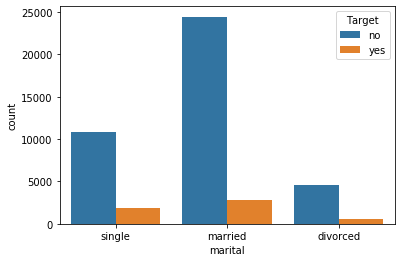

In [729]:
sns.countplot(x = 'marital', data = df_bank, order=['single', 'married','divorced'], hue = 'Target')

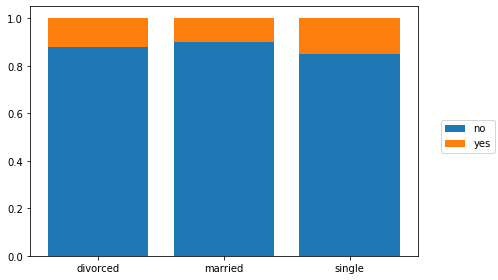

In [730]:
fig = dxp.aggplot(agg = 'marital', data = df_bank, hue='Target', normalize ='marital', 
                  stacked = True, figsize = (6,4))


doesn't seem like there is a correlation to target variable

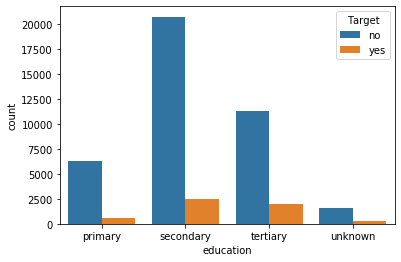

In [731]:
sns.countplot(x='education', hue = 'Target', data=df_bank,order = ['primary','secondary','tertiary','unknown'])

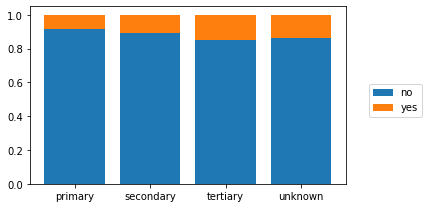

In [732]:
dxp.aggplot(agg = 'education', data = df_bank, hue='Target', normalize ='education', 
                  stacked = True, figsize = (5,3))

potential correlation - the more academic education you receive the more likelihood of taking term desposit

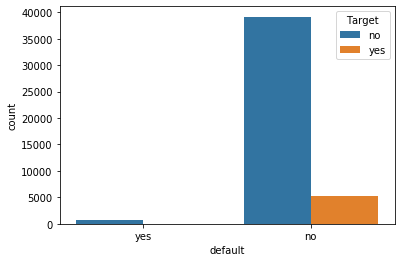

In [733]:
sns.countplot(x= 'default', data= df_bank, order =['yes','no'], hue ='Target')

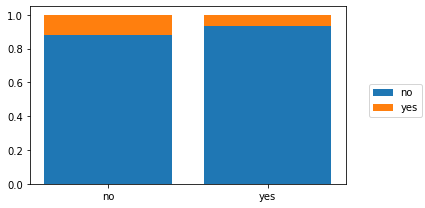

In [734]:
dxp.aggplot(agg = 'default', data = df_bank, hue='Target', normalize ='default', 
                  stacked = True, figsize = (5,3) )

on multivariate analysis of 'default' and 'target' columns, potential exhibit of correlation between these variables. The non defaulters have higher correlation to taking term deposits

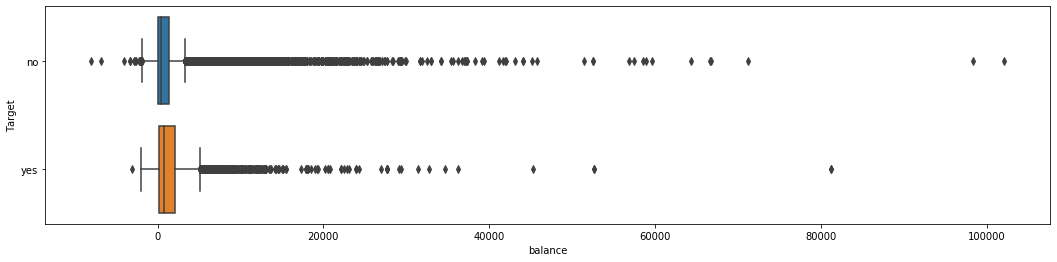

In [735]:
plt.figure(figsize=(18,4))
sns.boxplot(x='balance',y='Target', data = df_bank)

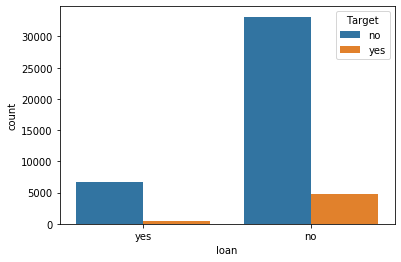

In [736]:
sns.countplot(x = 'loan', data = df_bank ,order=['yes','no'], hue = 'Target')

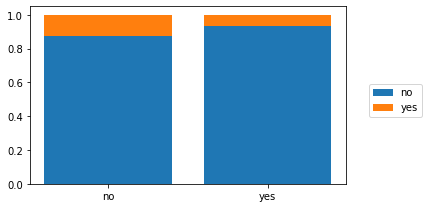

In [737]:
dxp.aggplot(agg = 'loan', data = df_bank, hue='Target', normalize ='loan', 
                  stacked = True, figsize = (5,3) )

on multivariate analysis of 'default' and 'target' columns, potential exhibit of correlation between these variables. 
Those without loans have higher correlation to taking term deposits

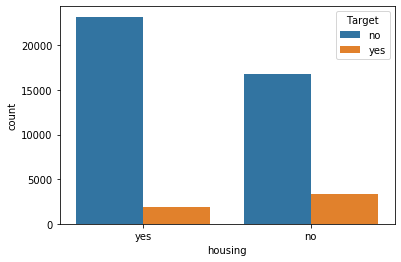

In [738]:
sns.countplot(x = 'housing', data = df_bank, hue = 'Target')

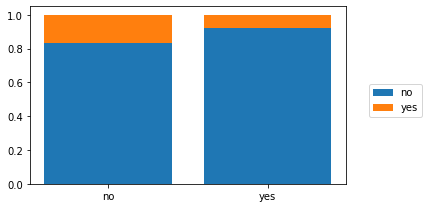

In [739]:
dxp.aggplot(agg = 'housing', data = df_bank, hue='Target', normalize ='housing', 
                  stacked = True, figsize = (5,3) )

on bivariate analysis of 'housing' and 'target' columns, potential exhibit of correlation between these variables. Those without housing loans have higher correlation to taking term deposits

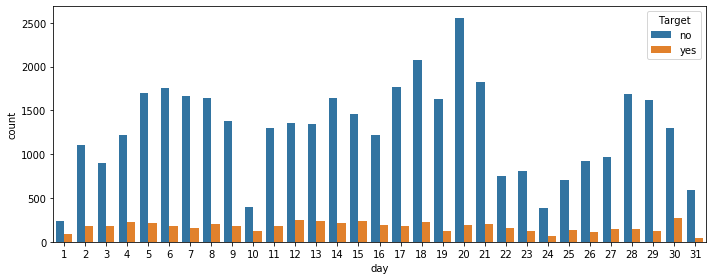

In [740]:
plt.figure(figsize=(10,4))
sns.countplot(x = 'day', data = df_bank, hue = 'Target')

plt.tight_layout()

this does not seem tto be a significan variable

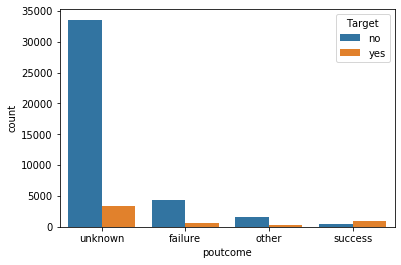

In [741]:
sns.countplot(x='poutcome', data=df_bank, hue ='Target')

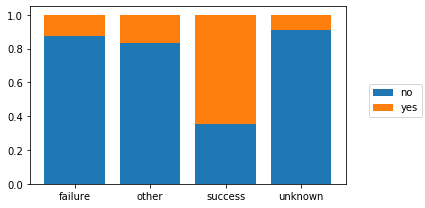

In [742]:
dxp.aggplot(agg = 'poutcome', data = df_bank, hue='Target', normalize ='poutcome', 
                  stacked = True, figsize = (5,3) )

too many "unknown" values but there does seem like a correlation between successful previous campaign and taking up of a term deposit

In [743]:
for each in df_bank.columns:
    print (each, df_bank[each].dtypes)

age int64
job object
marital object
education object
default object
balance int64
housing object
loan object
contact object
day int64
month object
duration int64
campaign int64
pdays int64
previous int64
poutcome object
Target object


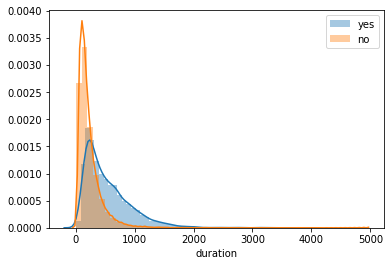

In [744]:
target_y = df_bank.loc[df_bank['Target']== 'yes']
target_n = df_bank.loc[df_bank['Target'] == 'no']
sns.distplot(target_y['duration'], label = 'yes')
sns.distplot(target_n['duration'], label = 'no')
plt.legend()

there seems to be a correlation between duration and Target variable

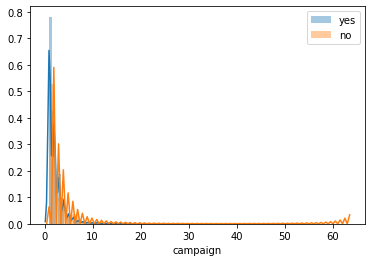

In [745]:
campaign_y = df_bank.loc[df_bank['Target']== 'yes']
campaign_n = df_bank.loc[df_bank['Target'] == 'no']
sns.distplot(target_y['campaign'], label = 'yes', hist = True )
sns.distplot(target_n['campaign'], label = 'no', hist= True)
plt.legend()

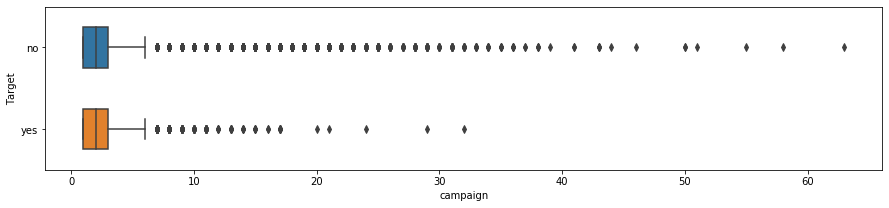

In [746]:
plt.figure(figsize=(15,3))
sns.boxplot( x = 'campaign', data =  df_bank, y = 'Target', width = 0.5)

not to sure what to make between correlation of these two variables at this stage

In [747]:
for feature in df_bank.columns: # Loop through all columns in the dataframe
    if df_bank[feature].dtype == 'object': # Only apply for columns with categorical strings
        df_bank[feature] = pd.Categorical(df_bank[feature])# Replace strings with an integer
df_bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [748]:
print(df_bank.job.value_counts())
print(df_bank.marital.value_counts())
print(df_bank.education.value_counts())
print(df_bank.contact.value_counts())
print(df_bank.poutcome.value_counts())
print(df_bank.month.value_counts())
print(df_bank.housing.value_counts())
print(df_bank.pdays.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717    

In [749]:
replaceStruct = {
                "education":     {"primary": 1, "secondary": 2 ,"tertiary": 3 ,"unknown":-1},
                "month": {"jan": 1, "feb":2 , "mar": 3, "apr": 4,"may": 5, "jun":6,"jul":7,
                          "aug":8,"sep":9,"oct":10,"nov":11,"dec":12},
                    }


In [750]:

labelEncodeCols = ["default", "housing", "loan", "Target"]

In [751]:
#Let’s encode variables that have yes/no variables using LabelEncoder.
# import LabelEncoder 
from sklearn.preprocessing import LabelEncoder
# Instatniate LabelEncoder
le = LabelEncoder()
# LabelEncode Book_Tablecolumn of df
for colname in labelEncodeCols:
    df_bank[colname] = le.fit_transform(df_bank[colname])
    # Inspecting encoded df
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [752]:
df_bank=df_bank.replace(replaceStruct)

In [753]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,3,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,2,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,2,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,-1,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,-1,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0


In [754]:
df_bank.loc[df_bank['month'] == 12]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
27716,41,technician,married,2,0,0,1,0,telephone,4,12,43,1,-1,0,unknown,0
27717,38,management,divorced,3,0,0,1,1,cellular,4,12,18,1,-1,0,unknown,0
27718,50,technician,married,3,0,72,0,0,telephone,5,12,12,1,-1,0,unknown,0
27719,30,blue-collar,single,2,0,130,0,0,telephone,5,12,291,1,-1,0,unknown,0
27720,22,management,single,3,0,760,0,0,telephone,7,12,6,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42586,30,management,single,3,0,2907,1,0,cellular,30,12,146,2,218,1,failure,0
42587,46,management,divorced,3,0,461,0,0,cellular,30,12,369,2,-1,0,unknown,1
42588,30,housemaid,single,3,0,3185,1,0,cellular,30,12,158,3,-1,0,unknown,0
42589,40,admin.,married,2,0,3126,1,0,cellular,30,12,110,3,232,2,failure,0


In [755]:
df_bank.iloc[42590:42592]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
42590,32,technician,married,-1,0,14533,0,0,cellular,31,12,646,3,198,2,success,0
42591,38,blue-collar,married,2,0,863,0,0,unknown,6,1,78,1,-1,0,unknown,0


In [756]:
df_bank.iloc[27720:27735]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
27720,22,management,single,3,0,760,0,0,telephone,7,12,6,1,-1,0,unknown,0
27721,39,technician,married,2,0,616,0,0,telephone,8,12,170,1,-1,0,unknown,0
27722,32,management,single,3,0,2223,0,0,unknown,9,12,10,1,-1,0,unknown,0
27723,34,services,married,3,0,1442,0,0,cellular,11,12,234,1,-1,0,unknown,0
27724,55,retired,divorced,2,0,366,0,0,telephone,11,12,173,1,-1,0,unknown,0
27725,38,management,married,3,0,0,1,0,telephone,12,12,136,1,-1,0,unknown,0
27726,32,blue-collar,single,2,0,232,0,0,unknown,13,12,232,1,-1,0,unknown,0
27727,53,management,divorced,2,0,1004,0,1,telephone,22,12,119,1,-1,0,unknown,1
27728,28,admin.,single,2,0,6100,0,0,unknown,27,12,333,1,-1,0,unknown,0
27729,59,management,married,3,0,2143,1,0,cellular,28,1,59,1,268,1,failure,0


row index <= 27728 is year 2008
row index >= 27729 and <=42590 is 2009
row index >=42591 is year 2010

In [757]:
rowIndex = df_bank.index[27728]
rowIndex

27728

In [758]:
df_bank.loc[0:rowIndex, 'year'] = 2008

In [759]:
df_bank.loc[27729:42590, 'year'] = 2009

In [760]:
df_bank.loc[42591:, 'year'] = 2010

In [761]:
df_bank.iloc[42590:42592]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,year
42590,32,technician,married,-1,0,14533,0,0,cellular,31,12,646,3,198,2,success,0,2009.0
42591,38,blue-collar,married,2,0,863,0,0,unknown,6,1,78,1,-1,0,unknown,0,2010.0


In [762]:
df_bank['date'] = pd.to_datetime(df_bank[['year','month','day']])
df_bank['day_of_week'] = df_bank['date'].dt.day_name()

In [763]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,year,date,day_of_week
0,58,management,married,3,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0,2008.0,2008-05-05,Monday
1,44,technician,single,2,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0,2008.0,2008-05-05,Monday
2,33,entrepreneur,married,2,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0,2008.0,2008-05-05,Monday
3,47,blue-collar,married,-1,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0,2008.0,2008-05-05,Monday
4,33,unknown,single,-1,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0,2008.0,2008-05-05,Monday


In [764]:
df_bank.day_of_week.value_counts()

Thursday     9754
Monday       9522
Wednesday    8914
Friday       8707
Tuesday      8264
Saturday       30
Sunday         20
Name: day_of_week, dtype: int64

In [765]:
df_bank.drop(['day','month','year'], axis=1)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,Target,date,day_of_week
0,58,management,married,3,0,2143,1,0,unknown,261,1,-1,0,unknown,0,2008-05-05,Monday
1,44,technician,single,2,0,29,1,0,unknown,151,1,-1,0,unknown,0,2008-05-05,Monday
2,33,entrepreneur,married,2,0,2,1,1,unknown,76,1,-1,0,unknown,0,2008-05-05,Monday
3,47,blue-collar,married,-1,0,1506,1,0,unknown,92,1,-1,0,unknown,0,2008-05-05,Monday
4,33,unknown,single,-1,0,1,0,0,unknown,198,1,-1,0,unknown,0,2008-05-05,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,3,0,825,0,0,cellular,977,3,-1,0,unknown,1,2010-11-17,Wednesday
45207,71,retired,divorced,1,0,1729,0,0,cellular,456,2,-1,0,unknown,1,2010-11-17,Wednesday
45208,72,retired,married,2,0,5715,0,0,cellular,1127,5,184,3,success,1,2010-11-17,Wednesday
45209,57,blue-collar,married,2,0,668,0,0,telephone,508,4,-1,0,unknown,0,2010-11-17,Wednesday


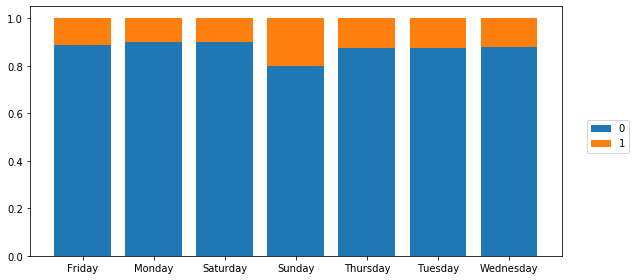

In [766]:
target_y = df_bank.loc[df_bank['Target']== 1]
target_n = df_bank.loc[df_bank['Target'] == 0]

dxp.aggplot(agg = 'day_of_week', data = df_bank, hue='Target', normalize ='day_of_week', 
                  stacked = True, figsize = (8,4),
            sort =True )
plt.show()


Do not see any particular correlation between Day of Week and the Target variable, even though there seems to be a noticable correlation between Sunday and the Target variable, this Sunday is a small proportion of the whole count

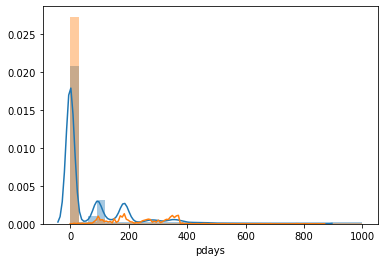

In [767]:
target_y = df_bank.loc[df_bank['Target']== 1]
target_n = df_bank.loc[df_bank['Target'] == 0]
sns.distplot(target_y['pdays'], label = 'yes',bins = [-1,30,60,90,120,1000])
sns.distplot(target_n['pdays'], label = 'no', bins = [-1,30,60,90,120,1000])

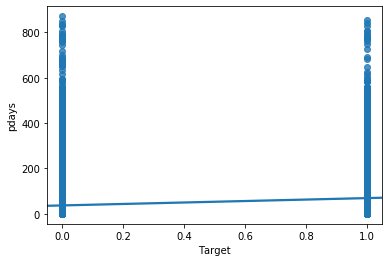

In [768]:
sns.regplot(x='Target',y='pdays',data = df_bank)

there isn't much correlation between pdays and Target variables

In [769]:
df_bank.columns.to_list()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'Target',
 'year',
 'date',
 'day_of_week']

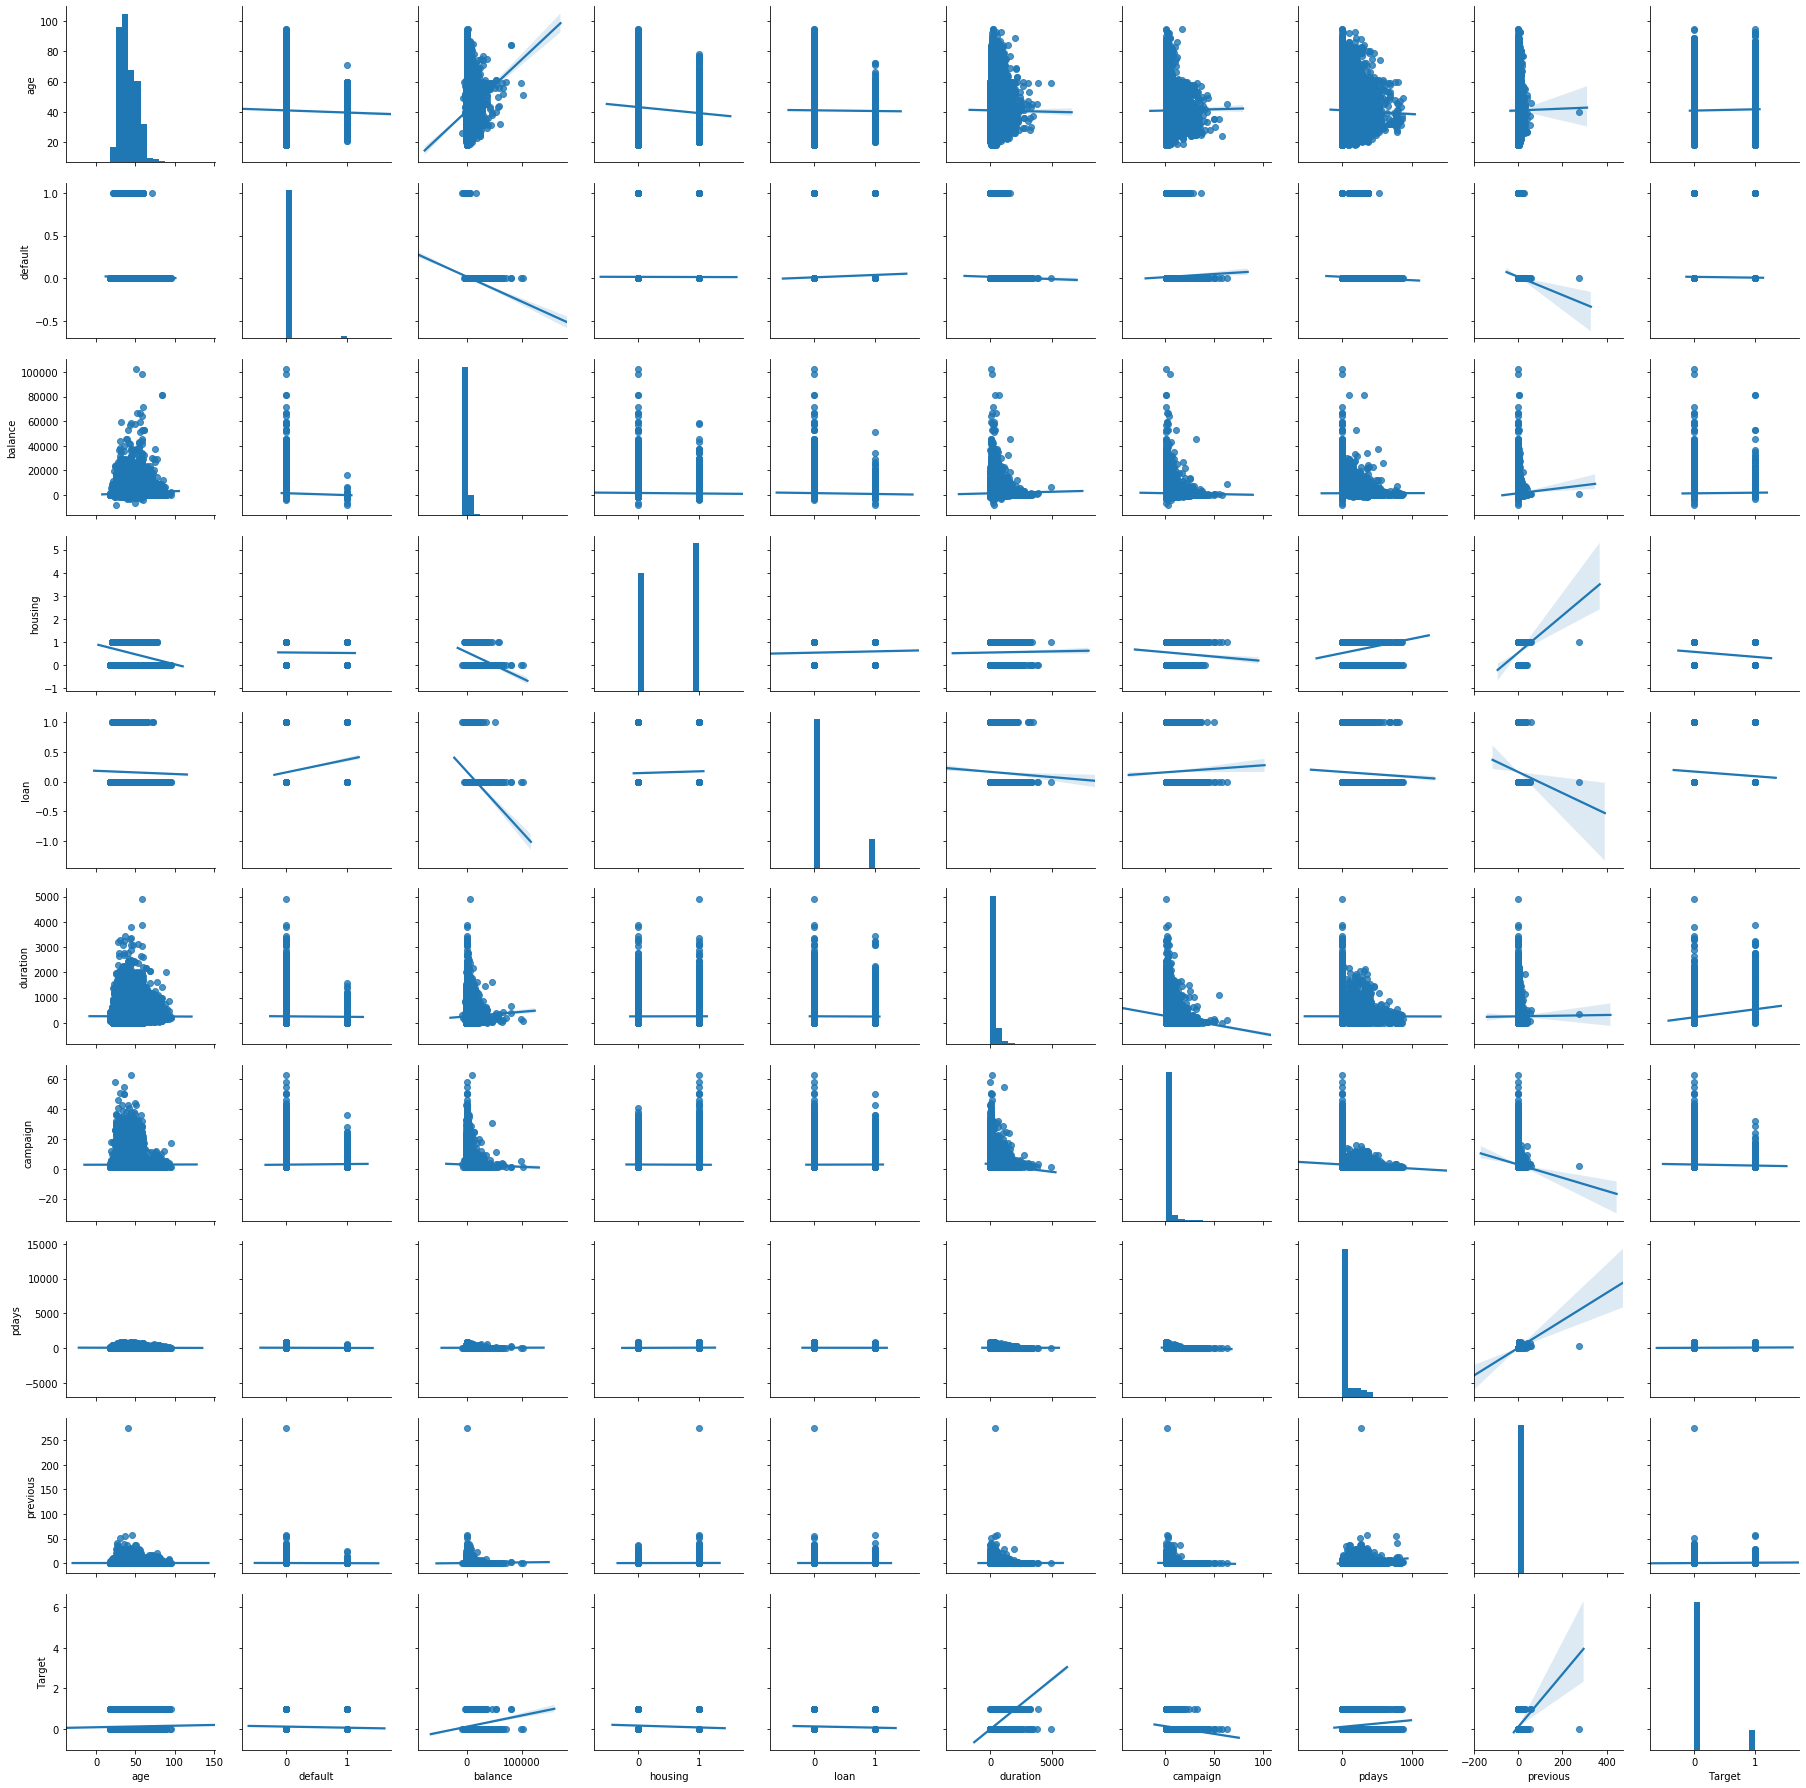

In [770]:
sns.pairplot(data=df_bank,
                  vars=['age', 'default', 'balance', 'housing', 'loan',
                        'duration', 'campaign', 'pdays', 'previous', 'Target'], kind = 'reg')

In [771]:
del df_bank['day']
del df_bank['month']
del df_bank['year']

In [772]:
replaceStruct = {
                "day_of_week": {"Saturday": 1, "Sunday":2 , "Monday": 3, "Tuesday": 4,"Wednesday": 5, 
                          "Thursday":6,"Friday":7},
                    }
df_bank=df_bank.replace(replaceStruct)

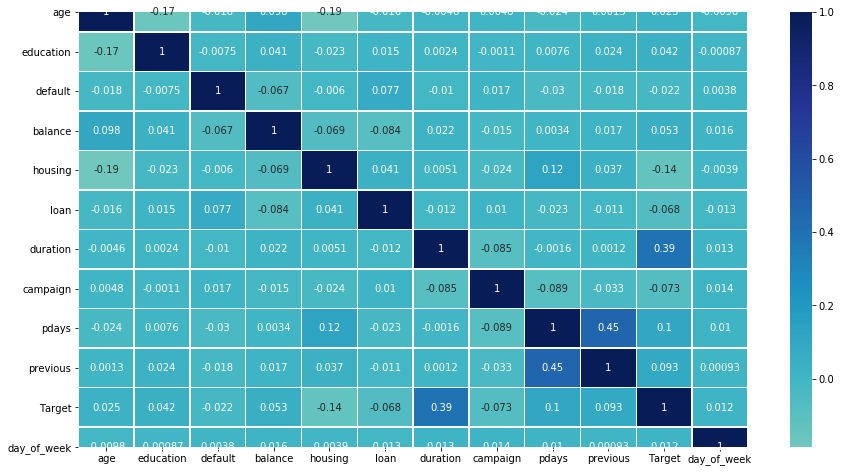

In [773]:
plt.figure(figsize=(15,8))
sns.heatmap(df_bank.corr(),
            annot=True,
            linewidths=0.5,
            center=0,
            cbar=True,
            cmap="YlGnBu")

duration, housing seem to have some material correlations. others are not very correlated to Target

In [774]:
oneHotCols=["job","marital","contact","poutcome"]
df_bank=pd.get_dummies(df_bank, columns=oneHotCols)

In [775]:
df_bank.head()
df_bank.corr()['Target']

age                  0.025155
education            0.041634
default             -0.022419
balance              0.052838
housing             -0.139173
loan                -0.068185
duration             0.394521
campaign            -0.073172
pdays                0.103621
previous             0.093236
Target               1.000000
day_of_week          0.012447
job_admin.           0.005637
job_blue-collar     -0.072083
job_entrepreneur    -0.019662
job_housemaid       -0.015195
job_management       0.032919
job_retired          0.079245
job_self-employed    0.000855
job_services        -0.027864
job_student          0.076897
job_technician      -0.008970
job_unemployed       0.020390
job_unknown          0.000267
marital_divorced     0.002772
marital_married     -0.060260
marital_single       0.063526
contact_cellular     0.135873
contact_telephone    0.014042
contact_unknown     -0.150935
poutcome_failure     0.009885
poutcome_other       0.031955
poutcome_success     0.306788
poutcome_u

# 1.3 Strategies to address the different data challenges

There are no missing or NAN values. There are a lot of unknown values and because there are so much we could potentially drop the whole column.
For columns where there are only a small proportion of unknown values, we can just leave it as is. For categorical, ordinal variables, the unknown values can be given a -1.


In [776]:
list = ['contact_cellular','contact_telephone', 'contact_unknown','poutcome_failure', 'poutcome_other',
       'poutcome_success','poutcome_unknown']
for each in list:
    del df_bank[each]


In [777]:
df_bank.head()

,age,education,default,balance,housing,loan,duration,campaign,pdays,previous,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,3,0,2143,1,0,261,1,-1,0,...,0,0,0,0,0,0,0,0,1,0
1,44,2,0,29,1,0,151,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
2,33,2,0,2,1,1,76,1,-1,0,...,0,0,0,0,0,0,0,0,1,0
3,47,-1,0,1506,1,0,92,1,-1,0,...,0,0,0,0,0,0,0,0,1,0
4,33,-1,0,1,0,0,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,1


In [778]:
df_bank.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'duration',
       'campaign', 'pdays', 'previous', 'Target', 'date', 'day_of_week',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single'],
      dtype='object')

# 2.1 Load data into dataframe

In [779]:
df_bank.head()

,age,education,default,balance,housing,loan,duration,campaign,pdays,previous,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,3,0,2143,1,0,261,1,-1,0,...,0,0,0,0,0,0,0,0,1,0
1,44,2,0,29,1,0,151,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
2,33,2,0,2,1,1,76,1,-1,0,...,0,0,0,0,0,0,0,0,1,0
3,47,-1,0,1506,1,0,92,1,-1,0,...,0,0,0,0,0,0,0,0,1,0
4,33,-1,0,1,0,0,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,1


In [780]:
df_bank.shape

(45211, 28)

In [781]:
df_bank.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'duration',
       'campaign', 'pdays', 'previous', 'Target', 'date', 'day_of_week',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single'],
      dtype='object')

In [782]:
df_bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
education,45211.0,2.019442,0.902795,-1.0,2.0,2.0,3.0,3.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# 2.2 Ensure Attribute Types are Correct 

In [783]:
df_bank.dtypes

age                           int64
education                     int64
default                       int64
balance                       int64
housing                       int64
loan                          int64
duration                      int64
campaign                      int64
pdays                         int64
previous                      int64
Target                        int64
date                 datetime64[ns]
day_of_week                   int64
job_admin.                    uint8
job_blue-collar               uint8
job_entrepreneur              uint8
job_housemaid                 uint8
job_management                uint8
job_retired                   uint8
job_self-employed             uint8
job_services                  uint8
job_student                   uint8
job_technician                uint8
job_unemployed                uint8
job_unknown                   uint8
marital_divorced              uint8
marital_married               uint8
marital_single              

In [784]:
df_bank['date'] = df_bank['date'].astype(int)/100000000000
df_bank.dtypes

age                    int64
education              int64
default                int64
balance                int64
housing                int64
loan                   int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
Target                 int64
date                 float64
day_of_week            int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
dtype: object

# 2.3 Transform the data

we've already performed label encording, one hot encoding and we have also scaled the categorical ordinal data

we can further transform the data by balancing the variables

In [785]:
df_bank.age.value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64

# 2.4 Create the training set and test set in ration of 70:30

In [786]:
y = df_bank['Target']
x = df_bank.drop(['Target'], axis=1)

In [787]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .3, random_state = 20)

In [788]:
print("Original Target True Values    : {0} ({1:0.2f}%)".format(len(df_bank.loc[df_bank['Target'] == 1]), (len(df_bank.loc[df_bank['Target'] == 1])/len(df_bank.index)) * 100))
print("Original Target  False Values   : {0} ({1:0.2f}%)".format(len(df_bank.loc[df_bank['Target'] == 0]), (len(df_bank.loc[df_bank['Target'] == 0])/len(df_bank.index)) * 100))
print("")
print("Training Target  True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Target False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Target  True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Target  False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Target True Values    : 5289 (11.70%)
Original Target  False Values   : 39922 (88.30%)

Training Target  True Values    : 3731 (11.79%)
Training Target False Values   : 27916 (88.21%)

Test Target  True Values        : 1558 (11.49%)
Test Target  False Values       : 12006 (88.51%)



# 3.1	Write python code using scikitlearn, pandas, numpy and others in Jupyter notebook to train and test the ensemble model.

In [789]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
import statsmodels.api as sm
from scipy import stats

# 3.2	First create a model using standard classification algorithm. Note the model performance.
# 3.3	Use appropriate algorithms and explain why that algorithm in the comment lines
# 3.4   Evaluate the model. Use confusion matrix to evaluate class level metrics i.e..Precision and recall. Also reflect the overall score of the model.
# 3.5 Advantages and disadvantages of the algorithm

We will first use logistic regression and then a decision tree (unpruned and pruned) as our standard classification algorithm

# 3.2.1 - Logistic Regression

In [790]:
logit = sm.Logit(y_train, sm.add_constant(x_train))
lg = logit.fit()
# fitting our training data to a logistic regression algorithm from statsmodel.api

Optimization terminated successfully.
         Current function value: 0.238712
         Iterations 8


//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [791]:
stats.chisqprob = lambda chisq, df_bank: stats.chi2.sf(chisq, df_bank)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31621
Method:                           MLE   Df Model:                           25
Date:                Fri, 31 Jan 2020   Pseudo R-squ.:                  0.3419
Time:                        16:00:21   Log-Likelihood:                -7554.5
converged:                       True   LL-Null:                       -11479.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -50.0749        nan        nan        nan         nan         nan
age                  -0.0027      0.003     -1.066      0.286      -0.008       0.002
education             0.

//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
//anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
//anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
//anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


A pseudo R^2 of 23% indicates that 23% of the uncertainty of the intercept only model is explained by the full model

In [792]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
#fitting our training data to scikit-learn logistic regression package.

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [793]:
pred_train = logreg.predict(x_train)
#prediction of class outcome from x_train (training independent variables)

In [794]:
#Predict for train set
pred_train = logreg.predict(x_train)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

mat_train = confusion_matrix(y_train,pred_train)

print("confusion matrix = \n",mat_train)

#Recall
print('Recall of train dataset is ' + str(mat_train[1,1]/(mat_train[1,1]+mat_train[1,0])))


confusion matrix = 
 [[27907     9]
 [ 3731     0]]
Recall of train dataset is 0.0


In [795]:
#Predict for test set
pred_test = logreg.predict(x_test)

mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",mat_test)

#Recall
print('Recall of test dataset is ' + str(mat_test[1,1]/(mat_test[1,1]+mat_test[1,0])))

confusion matrix = 
 [[12004     2]
 [ 1556     2]]
Recall of test dataset is 0.0012836970474967907


In [796]:
print('accuracy score of train dataset is '+ str(accuracy_score(y_train,pred_train)))
print('accuracy score of test dataset is '+ str(accuracy_score(y_test,pred_test)))

accuracy score of train dataset is 0.8818213416753563
accuracy score of test dataset is 0.8851371276909467


In [797]:
print("Accuracy of train:",metrics.accuracy_score(y_train, pred_train))
print("Precision of train:",metrics.precision_score(y_train, pred_train))
print("Precision of test:",metrics.precision_score(y_test, pred_test))
print("Recall of train:",metrics.recall_score(y_train, pred_train))
print("Recall of test:",metrics.recall_score(y_test, pred_test))

Accuracy of train: 0.8818213416753563
Precision of train: 0.0
Precision of test: 0.5
Recall of train: 0.0
Recall of test: 0.0012836970474967907


In [798]:
resultsdf = None

In [799]:
tempresultsdf = pd.DataFrame({'model':['LogisticRegression'], 'accuracy_train':[accuracy_score(y_train,pred_train)],
                         'accuracy_test':[accuracy_score(y_test,pred_test)], 'precision_train':[metrics.precision_score(y_train, pred_train)],
                         'precision_test':[metrics.precision_score(y_test, pred_test)], 'recall_train':[metrics.recall_score(y_train, pred_train)],
                         'recall_test':[metrics.recall_score(y_test, pred_test)]})
resultsdf = pd.concat([resultsdf, tempresultsdf])
resultsdf 

,model,accuracy_train,accuracy_test,precision_train,precision_test,recall_train,recall_test
0,LogisticRegression,0.881821,0.885137,0.0,0.5,0.0,0.001284


# 3.2.2 - Decision Tree

In [800]:
from sklearn.tree import DecisionTreeClassifier

In [801]:
model_entropy=DecisionTreeClassifier(criterion='entropy',random_state = 100)

In [802]:
model_entropy.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [803]:
#accuracy on train data
model_entropy.score(x_train, y_train)

1.0

In [804]:
#check
pred_dt_train=model_entropy.predict(x_train)
actual_dt_train=y_train[:,]
accuracy_score(pred_dt_train,actual_dt_train)

1.0

In [805]:
#accracy on test data
model_entropy.score(x_test, y_test)

0.8882335594219994

In [806]:
#check
pred_dt=model_entropy.predict(x_test)
actual_dt=y_test[:,]
accuracy_score(pred_dt,actual_dt)

0.8882335594219994

In [807]:
print("confusion matrix of test dataset = \n",confusion_matrix(pred_dt,actual_dt))
print("confusion matrix of trained dataset = \n",confusion_matrix(pred_dt_train,actual_dt_train))

confusion matrix of test dataset = 
 [[11209   719]
 [  797   839]]
confusion matrix of trained dataset = 
 [[27916     0]
 [    0  3731]]


In [808]:
print("confusion matrix of test dataset = \n",confusion_matrix(actual_dt, pred_dt))
print("confusion matrix of trained dataset = \n",confusion_matrix(actual_dt_train, pred_dt_train))

confusion matrix of test dataset = 
 [[11209   797]
 [  719   839]]
confusion matrix of trained dataset = 
 [[27916     0]
 [    0  3731]]


In [809]:
tempresultsdf = pd.DataFrame({'model':['DecisionTree'], 
                          'accuracy_train':[accuracy_score(actual_dt_train, pred_dt_train)],
                         'accuracy_test':[accuracy_score(actual_dt, pred_dt)], 
                          'precision_train':[metrics.precision_score(actual_dt_train, pred_dt_train)],
                         'precision_test':[metrics.precision_score(actual_dt, pred_dt)], 
                          'recall_train':[metrics.recall_score(actual_dt_train, pred_dt_train)],
                         'recall_test':[metrics.recall_score(actual_dt, pred_dt)]})
resultsdf = pd.concat([resultsdf, tempresultsdf])
resultsdf 

,model,accuracy_train,accuracy_test,precision_train,precision_test,recall_train,recall_test
0,LogisticRegression,0.881821,0.885137,0.0,0.500000,0.0,0.001284
0,DecisionTree,1.000000,0.888234,1.0,0.512836,1.0,0.538511


In [810]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

feature_cols = x_train.columns

In [811]:
#dot_data = StringIO()
#export_graphviz(model_entropy, out_file=dot_data,  
#                filled=True, rounded=True,
#                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

#graph.write_png('bank.png')

In [812]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, max_features=9)
clf_pruned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [813]:
#dot_data = StringIO()
#export_graphviz(clf_pruned, out_file=dot_data,  
#                filled=True, rounded=True,
#                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('bank_pruned.png')

In [814]:
#Image(graph.create_png())

In [815]:
preds_pruned = clf_pruned.predict(x_test)
preds_pruned_train = clf_pruned.predict(x_train)
print('accuracy of pruned test dataset ' + str(accuracy_score(y_test,preds_pruned)))
print('accuracy of pruned train dataset ' + str(accuracy_score(y_train,preds_pruned_train)))
print('precision of pruned test dataset ' + str(metrics.precision_score(y_test,preds_pruned)))
print('precision of pruned train dataset ' + str(metrics.precision_score(y_train,preds_pruned_train)))
print('recall of pruned test dataset ' + str(metrics.recall_score(y_test,preds_pruned)))
print('recall of pruned train dataset ' + str(metrics.recall_score(y_train,preds_pruned_train)))

accuracy of pruned test dataset 0.8862429961663226
accuracy of pruned train dataset 0.883559263121307
precision of pruned test dataset 0.5572519083969466
precision of pruned train dataset 0.5761589403973509
recall of pruned test dataset 0.04685494223363286
recall of pruned train dataset 0.046636290538729565


In [816]:
tempresultsdf = pd.DataFrame({'model':['DecisionTree_pruned'], 
                          'accuracy_train':[accuracy_score(y_train,preds_pruned_train)],
                         'accuracy_test':[accuracy_score(y_test,preds_pruned)], 
                          'precision_train':[metrics.precision_score(y_train,preds_pruned_train)],
                         'precision_test':[metrics.precision_score(y_test,preds_pruned)], 
                          'recall_train':[metrics.recall_score(y_train,preds_pruned_train)],
                         'recall_test':[metrics.recall_score(y_test,preds_pruned)]})
resultsdf = pd.concat([resultsdf, tempresultsdf])
resultsdf 

,model,accuracy_train,accuracy_test,precision_train,precision_test,recall_train,recall_test
0,LogisticRegression,0.881821,0.885137,0.000000,0.500000,0.000000,0.001284
0,DecisionTree,1.000000,0.888234,1.000000,0.512836,1.000000,0.538511
0,DecisionTree_pruned,0.883559,0.886243,0.576159,0.557252,0.046636,0.046855


In [817]:
mat_train = confusion_matrix(y_train,preds_pruned_train)
print(mat_train)
print('Recall of train dataset is ' + str(mat_train[1,1]/(mat_train[1,1]+mat_train[1,0])))

[[27788   128]
 [ 3557   174]]
Recall of train dataset is 0.046636290538729565


In [818]:
mat_test = confusion_matrix(y_test,preds_pruned)
print(mat_test)
print('Recall of test dataset is ' + str(mat_test[1,1]/(mat_test[1,1]+mat_test[1,0])))

[[11948    58]
 [ 1485    73]]
Recall of test dataset is 0.04685494223363286


# 3.5	Advantages and disadvantages of the algorithm.


LogisticRegression
<br>
<br>
    Advantages - independent variables don't have to be normally distributed
<br>
    Disadvantages - variables that have weak correlation to dependent variable do not offer much help in prediction
<br>
<br>
DecisionTree_non prune
<br>
<br>
    Advantages - procesing is intuitive
<br>
    Disadvantages - Although the logic is intuitive, processing can be heavy. Will overfit the data. i.e. will produce good scores on the train dataset but relatively poor scores on the test dataset. 
<br>
<br>
DecisionTree_pruned
<br>
<br>
    Advantages - solve the over fitting problem
<br>
    Disadvantages - procesing is still cumbersome, and if starting with weak predictors it will be difficult to achieve a good result even with many independent variables
<br>
<br>
RandomForest
<br>
<br>
    Advantages - given a poor/average prediction results from decision tree model, you can improve it through random forest method. you are pooling weak predictors and making the predictions stronger through numbers. Allows the model to recycle the data for gain in your model's score.
<br>
    Disadvantages - computationally heavy and will overfit if allowed to grow.
<br>
<br>
RandomForest_pruned
<br>
<br>
    Advantages - by pruning, overfitting can be prevented and therefore computationally managemable. 
<br>
    Disadvantages - in order to achieve good outcome, may have to sacrifice computation still.
<br>
<br>
BaggingClassifier
<br>
<br>
    Advantages - uses voting, like random forest and uses same type of model. So long as you can explain the base model, it's then easy to interpret the resutls. Equal weights on the model, models are independetly built
<br>
    Disadvantages - with  many hyper parameters to choose from, need to invest on finding the optimal ensemble model
<br>
<br>
Boosting
<br>
<br>
    Advantages - New model is influenced by the performance of the model built previously. So the logic is to build underfitted (shallow trees) and then the proceeding models will build upon it to boost the overall performance. It's primarilty used to reduce bias as well as variance.
<br>
    Disadvantages - harder to tune, due to so many hyperparameters, and hard to interpret
<br>
<br>


# 3.6	Build the ensemble models and compare the results with the base model. Note: Random forest can be used only with Decision trees. 


# 3.6.2 Random Forest

In [819]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100)
rfcl = rfcl.fit(x_train, y_train)

In [820]:
pred_RF = rfcl.predict(x_test)

In [821]:
acc_RF = accuracy_score(y_test, pred_RF)
acc_RF

0.9107932763196697

In [822]:
pred_RF_training = rfcl.predict(x_train)
acc_RF_training= accuracy_score(y_train, pred_RF_training)
acc_RF_training

1.0

In [823]:
pred_RF = rfcl.predict(x_test)
acc_RF = accuracy_score(y_test, pred_RF)
print ("Testing Accuracy :",acc_RF)
pred_RF_training = rfcl.predict(x_train)
acc_RF_training= accuracy_score(y_train, pred_RF_training)
print ("Training Accuracy :",acc_RF_training)
print('precision of test dataset ' + str(metrics.precision_score(y_test,pred_RF)))
print('precision of train dataset ' + str(metrics.precision_score(y_train,pred_RF_training)))
print('recall of test dataset ' + str(metrics.recall_score(y_test,pred_RF)))
print('recall of train dataset ' + str(metrics.recall_score(y_train,pred_RF_training)))

Testing Accuracy : 0.9107932763196697
Training Accuracy : 1.0
precision of test dataset 0.6550802139037433
precision of train dataset 1.0
recall of test dataset 0.47175866495507063
recall of train dataset 1.0


In [824]:
tempresultsdf = pd.DataFrame({'model':['RandomForest'], 
                          'accuracy_train':[acc_RF_training],
                         'accuracy_test':[acc_RF], 
                          'precision_train':[metrics.precision_score(y_train,pred_RF_training)],
                         'precision_test':[metrics.precision_score(y_test,pred_RF)], 
                          'recall_train':[metrics.recall_score(y_train,pred_RF_training)],
                         'recall_test':[metrics.recall_score(y_test,pred_RF)]})
resultsdf = pd.concat([resultsdf, tempresultsdf])
resultsdf 

,model,accuracy_train,accuracy_test,precision_train,precision_test,recall_train,recall_test
0,LogisticRegression,0.881821,0.885137,0.000000,0.500000,0.000000,0.001284
0,DecisionTree,1.000000,0.888234,1.000000,0.512836,1.000000,0.538511
0,DecisionTree_pruned,0.883559,0.886243,0.576159,0.557252,0.046636,0.046855
0,RandomForest,1.000000,0.910793,1.000000,0.655080,1.000000,0.471759


In [825]:
print("confusion matrix of test dataset = \n",confusion_matrix(y_test, pred_RF))
print("confusion matrix of trained dataset = \n",confusion_matrix(y_train,pred_RF_training))

confusion matrix of test dataset = 
 [[11619   387]
 [  823   735]]
confusion matrix of trained dataset = 
 [[27916     0]
 [    0  3731]]


In [826]:
#Pruned Random Forest 
rfcl_pr = RandomForestClassifier(n_estimators = 100,criterion = "entropy", random_state = 100,
                              max_depth=8, min_samples_leaf=5)
rfcl_pr = rfcl_pr.fit(x_train, y_train)

In [827]:
pred_RF_pr = rfcl_pr.predict(x_test)
acc_RF_pr = accuracy_score(y_test, pred_RF_pr)
print ("Testing Accuracy :",acc_RF_pr)
pred_RF_pr_training = rfcl_pr.predict(x_train)
acc_RF_pr_training= accuracy_score(y_train, pred_RF_pr_training)
print ("Training Accuracy :",acc_RF_pr_training)
print('precision of pruned test dataset ' + str(metrics.precision_score(y_test,pred_RF_pr)))
print('precision of pruned train dataset ' + str(metrics.precision_score(y_train,pred_RF_pr_training)))
print('recall of pruned test dataset ' + str(metrics.recall_score(y_test,pred_RF_pr)))
print('recall of pruned train dataset ' + str(metrics.recall_score(y_train,pred_RF_pr_training)))

Testing Accuracy : 0.9017988793866116
Training Accuracy : 0.9034663633203779
precision of pruned test dataset 0.6799363057324841
precision of pruned train dataset 0.7387005649717514
recall of pruned test dataset 0.2740693196405648
recall of pruned train dataset 0.2803537925489145


In [828]:
print("confusion matrix of test dataset = \n",confusion_matrix(y_test, pred_RF_pr))
print("confusion matrix of trained dataset = \n",confusion_matrix(y_train,pred_RF_pr_training))

confusion matrix of test dataset = 
 [[11805   201]
 [ 1131   427]]
confusion matrix of trained dataset = 
 [[27546   370]
 [ 2685  1046]]


In [829]:
tempresultsdf = pd.DataFrame({'model':['RandomForest_pruned'], 
                          'accuracy_train':[acc_RF_pr_training],
                         'accuracy_test':[acc_RF_pr], 
                          'precision_train':[metrics.precision_score(y_train,pred_RF_pr_training)],
                         'precision_test':[metrics.precision_score(y_test,pred_RF_pr)], 
                          'recall_train':[metrics.recall_score(y_train,pred_RF_pr_training)],
                         'recall_test':[metrics.recall_score(y_test,pred_RF_pr)]})
resultsdf = pd.concat([resultsdf, tempresultsdf])
resultsdf 

,model,accuracy_train,accuracy_test,precision_train,precision_test,recall_train,recall_test
0,LogisticRegression,0.881821,0.885137,0.000000,0.500000,0.000000,0.001284
0,DecisionTree,1.000000,0.888234,1.000000,0.512836,1.000000,0.538511
0,DecisionTree_pruned,0.883559,0.886243,0.576159,0.557252,0.046636,0.046855
0,RandomForest,1.000000,0.910793,1.000000,0.655080,1.000000,0.471759
0,RandomForest_pruned,0.903466,0.901799,0.738701,0.679936,0.280354,0.274069


# 3.6.2 Bagging Technique

In [830]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=100, max_samples= 1.0, bootstrap=True, random_state=100)
bgcl = bgcl.fit(x_train, y_train)

In [831]:
pred_BG = bgcl.predict(x_test)
acc_BG = accuracy_score(y_test, pred_BG)
print ("Testing Accuracy :",acc_BG)
pred_BG_training = bgcl.predict(x_train)
acc_BG_training= accuracy_score(y_train, pred_BG_training)
print ("Training Accuracy :",acc_BG_training)
print('precision of test dataset ' + str(metrics.precision_score(y_test,pred_BG)))
print('precision of train dataset ' + str(metrics.precision_score(y_train,pred_BG_training)))
print('recall of test dataset ' + str(metrics.recall_score(y_test,pred_BG)))
print('recall of train dataset ' + str(metrics.recall_score(y_train,pred_BG_training)))

Testing Accuracy : 0.9099085815393689
Training Accuracy : 0.9999684014282555
precision of test dataset 0.6186440677966102
precision of train dataset 1.0
recall of test dataset 0.5622593068035944
recall of train dataset 0.9997319753417314


In [832]:
print("confusion matrix of test dataset = \n",confusion_matrix(y_test, pred_BG))
print("confusion matrix of trained dataset = \n",confusion_matrix(y_train,pred_BG_training))

confusion matrix of test dataset = 
 [[11466   540]
 [  682   876]]
confusion matrix of trained dataset = 
 [[27916     0]
 [    1  3730]]


In [833]:
tempresultsdf = pd.DataFrame({'model':['BaggingClassifier'], 
                          'accuracy_train':[acc_BG_training],
                         'accuracy_test':[acc_BG], 
                          'precision_train':[metrics.precision_score(y_train,pred_BG_training)],
                         'precision_test':[metrics.precision_score(y_test,pred_BG)], 
                          'recall_train':[metrics.recall_score(y_train,pred_BG_training)],
                         'recall_test':[metrics.recall_score(y_test,pred_BG)]})
resultsdf = pd.concat([resultsdf, tempresultsdf])
resultsdf 

,model,accuracy_train,accuracy_test,precision_train,precision_test,recall_train,recall_test
0,LogisticRegression,0.881821,0.885137,0.000000,0.500000,0.000000,0.001284
0,DecisionTree,1.000000,0.888234,1.000000,0.512836,1.000000,0.538511
0,DecisionTree_pruned,0.883559,0.886243,0.576159,0.557252,0.046636,0.046855
0,RandomForest,1.000000,0.910793,1.000000,0.655080,1.000000,0.471759
0,RandomForest_pruned,0.903466,0.901799,0.738701,0.679936,0.280354,0.274069
0,BaggingClassifier,0.999968,0.909909,1.000000,0.618644,0.999732,0.562259


In [834]:
dt=DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                              max_depth=7, min_samples_leaf=5)

In [835]:
bgcl_dt = BaggingClassifier(base_estimator = dt, n_estimators=100, max_samples= 1.0, bootstrap=True, random_state=100)
bgcl_dt = bgcl_dt.fit(x_train, y_train)

In [836]:
pred_BG_dt = bgcl_dt.predict(x_test)
acc_BG_dt = accuracy_score(y_test, pred_BG_dt)
print ("Testing Accuracy :",acc_BG_dt)
pred_BG_dt_training = bgcl_dt.predict(x_train)
acc_BG_dt_training= accuracy_score(y_train, pred_BG_dt_training)
print ("Training Accuracy :",acc_BG_dt_training)
print('precision of test dataset ' + str(metrics.precision_score(y_test,pred_BG_dt)))
print('precision of train dataset ' + str(metrics.precision_score(y_train,pred_BG_dt_training)))
print('recall of test dataset ' + str(metrics.recall_score(y_test,pred_BG_dt)))
print('recall of train dataset ' + str(metrics.recall_score(y_train,pred_BG_dt_training)))

Testing Accuracy : 0.9135948097906222
Training Accuracy : 0.9202136063449932
precision of test dataset 0.6309362279511533
precision of train dataset 0.6752906976744186
recall of test dataset 0.5969191270860077
recall of train dataset 0.6226212811578665


In [837]:
print("confusion matrix of test dataset = \n",confusion_matrix(y_test, pred_BG_dt))
print("confusion matrix of trained dataset = \n",confusion_matrix(y_train,pred_BG_dt_training))

confusion matrix of test dataset = 
 [[11462   544]
 [  628   930]]
confusion matrix of trained dataset = 
 [[26799  1117]
 [ 1408  2323]]


In [838]:
tempresultsdf = pd.DataFrame({'model':['BaggingClassifier_DT'], 
                          'accuracy_train':[acc_BG_dt_training],
                         'accuracy_test':[acc_BG_dt], 
                          'precision_train':[metrics.precision_score(y_train,pred_BG_dt_training)],
                         'precision_test':[metrics.precision_score(y_test,pred_BG_dt)], 
                          'recall_train':[metrics.recall_score(y_train,pred_BG_dt_training)],
                         'recall_test':[metrics.recall_score(y_test,pred_BG_dt)]})
resultsdf = pd.concat([resultsdf, tempresultsdf])
resultsdf 

,model,accuracy_train,accuracy_test,precision_train,precision_test,recall_train,recall_test
0,LogisticRegression,0.881821,0.885137,0.000000,0.500000,0.000000,0.001284
0,DecisionTree,1.000000,0.888234,1.000000,0.512836,1.000000,0.538511
0,DecisionTree_pruned,0.883559,0.886243,0.576159,0.557252,0.046636,0.046855
0,RandomForest,1.000000,0.910793,1.000000,0.655080,1.000000,0.471759
0,RandomForest_pruned,0.903466,0.901799,0.738701,0.679936,0.280354,0.274069
0,BaggingClassifier,0.999968,0.909909,1.000000,0.618644,0.999732,0.562259
0,BaggingClassifier_DT,0.920214,0.913595,0.675291,0.630936,0.622621,0.596919


In [839]:
lr = LogisticRegression()
bgcl_lr = BaggingClassifier(base_estimator = lr, n_estimators=100, max_samples= 1.0, bootstrap=True, random_state=100)
bgcl_lr = bgcl_lr.fit(x_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

In [840]:
pred_BG_lr = bgcl_lr.predict(x_test)
acc_BG_lr = accuracy_score(y_test, pred_BG_lr)
print ("Testing Accuracy :",acc_BG_lr)
pred_BG_lr_training = bgcl_lr.predict(x_train)
acc_BG_lr_training= accuracy_score(y_train, pred_BG_lr_training)
print ("Training Accuracy :",acc_BG_lr_training)
print('precision of test dataset ' + str(metrics.precision_score(y_test,pred_BG_lr)))
print('precision of train dataset ' + str(metrics.precision_score(y_train,pred_BG_lr_training)))
print('recall of test dataset ' + str(metrics.recall_score(y_test,pred_BG_lr)))
print('recall of train dataset ' + str(metrics.recall_score(y_train,pred_BG_lr_training)))

Testing Accuracy : 0.8851371276909467
Training Accuracy : 0.8821057288210573
precision of test dataset 0.0
precision of train dataset 0.0
recall of test dataset 0.0
recall of train dataset 0.0


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [841]:
print("confusion matrix of test dataset = \n",confusion_matrix(y_test, pred_BG_lr))
print("confusion matrix of trained dataset = \n",confusion_matrix(y_train,pred_BG_lr_training))

confusion matrix of test dataset = 
 [[12006     0]
 [ 1558     0]]
confusion matrix of trained dataset = 
 [[27916     0]
 [ 3731     0]]


In [842]:
tempresultsdf = pd.DataFrame({'model':['BaggingClassifier_LR'], 
                          'accuracy_train':[acc_BG_lr_training],
                         'accuracy_test':[acc_BG_lr], 
                          'precision_train':[metrics.precision_score(y_train,pred_BG_lr_training)],
                         'precision_test':[metrics.precision_score(y_test,pred_BG_lr)], 
                          'recall_train':[metrics.recall_score(y_train,pred_BG_lr_training)],
                         'recall_test':[metrics.recall_score(y_test,pred_BG_lr)]})
resultsdf = pd.concat([resultsdf, tempresultsdf])
resultsdf 

,model,accuracy_train,accuracy_test,precision_train,precision_test,recall_train,recall_test
0,LogisticRegression,0.881821,0.885137,0.000000,0.500000,0.000000,0.001284
0,DecisionTree,1.000000,0.888234,1.000000,0.512836,1.000000,0.538511
0,DecisionTree_pruned,0.883559,0.886243,0.576159,0.557252,0.046636,0.046855
0,RandomForest,1.000000,0.910793,1.000000,0.655080,1.000000,0.471759
0,RandomForest_pruned,0.903466,0.901799,0.738701,0.679936,0.280354,0.274069
0,BaggingClassifier,0.999968,0.909909,1.000000,0.618644,0.999732,0.562259
0,BaggingClassifier_DT,0.920214,0.913595,0.675291,0.630936,0.622621,0.596919
0,BaggingClassifier_LR,0.882106,0.885137,0.000000,0.000000,0.000000,0.000000


# 3.6.2 ADA Boosting Technique

In [843]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 100,learning_rate=1.0 ,random_state=100)
abcl = abcl.fit(x_train, y_train)

In [844]:
pred_AB = abcl.predict(x_test)
acc_AB = accuracy_score(y_test, pred_AB)
print ("Testing Accuracy :",acc_AB)
pred_AB_training = abcl.predict(x_train)
acc_AB_training= accuracy_score(y_train, pred_AB_training)
print ("Training Accuracy :",acc_AB_training)
print('precision of test dataset ' + str(metrics.precision_score(y_test,pred_AB)))
print('precision of train dataset ' + str(metrics.precision_score(y_train,pred_AB_training)))
print('recall of test dataset ' + str(metrics.recall_score(y_test,pred_AB)))
print('recall of train dataset ' + str(metrics.recall_score(y_train,pred_AB_training)))

Testing Accuracy : 0.9067384252432911
Training Accuracy : 0.9006540904351124
precision of test dataset 0.6553552492046659
precision of train dataset 0.6360686138154845
recall of test dataset 0.39666238767650835
recall of train dataset 0.3677298311444653


In [845]:
print("confusion matrix of test dataset = \n",confusion_matrix(y_test, pred_AB))
print("confusion matrix of trained dataset = \n",confusion_matrix(y_train,pred_AB_training))

confusion matrix of test dataset = 
 [[11681   325]
 [  940   618]]
confusion matrix of trained dataset = 
 [[27131   785]
 [ 2359  1372]]


In [846]:
tempresultsdf = pd.DataFrame({'model':['ADABoosting'], 
                          'accuracy_train':[acc_AB_training],
                         'accuracy_test':[acc_AB], 
                          'precision_train':[metrics.precision_score(y_train,pred_AB_training)],
                         'precision_test':[metrics.precision_score(y_test,pred_AB)], 
                          'recall_train':[metrics.recall_score(y_train,pred_AB_training)],
                         'recall_test':[metrics.recall_score(y_test,pred_AB)]})
resultsdf = pd.concat([resultsdf, tempresultsdf])
resultsdf 

,model,accuracy_train,accuracy_test,precision_train,precision_test,recall_train,recall_test
0,LogisticRegression,0.881821,0.885137,0.000000,0.500000,0.000000,0.001284
0,DecisionTree,1.000000,0.888234,1.000000,0.512836,1.000000,0.538511
0,DecisionTree_pruned,0.883559,0.886243,0.576159,0.557252,0.046636,0.046855
0,RandomForest,1.000000,0.910793,1.000000,0.655080,1.000000,0.471759
0,RandomForest_pruned,0.903466,0.901799,0.738701,0.679936,0.280354,0.274069
0,BaggingClassifier,0.999968,0.909909,1.000000,0.618644,0.999732,0.562259
0,BaggingClassifier_DT,0.920214,0.913595,0.675291,0.630936,0.622621,0.596919
0,BaggingClassifier_LR,0.882106,0.885137,0.000000,0.000000,0.000000,0.000000
0,ADABoosting,0.900654,0.906738,0.636069,0.655355,0.367730,0.396662


# 3.6.2 Gradient Boosting Technique

In [847]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 100,learning_rate=0.2, random_state=100)
gbcl = gbcl.fit(x_train, y_train)

In [848]:
pred_GB = gbcl.predict(x_test)
acc_GB = accuracy_score(y_test, pred_GB)
print ("Testing Accuracy :",acc_GB)
pred_GB_training = gbcl.predict(x_train)
acc_GB_training= accuracy_score(y_train, pred_GB_training)
print ("Training Accuracy :",acc_GB_training)
print('precision of test dataset ' + str(metrics.precision_score(y_test,pred_GB)))
print('precision of train dataset ' + str(metrics.precision_score(y_train,pred_GB_training)))
print('recall of test dataset ' + str(metrics.recall_score(y_test,pred_GB)))
print('recall of train dataset ' + str(metrics.recall_score(y_train,pred_GB_training)))

Testing Accuracy : 0.9147744028310233
Training Accuracy : 0.9209087749233734
precision of test dataset 0.6446043165467625
precision of train dataset 0.6932032724984267
recall of test dataset 0.5750962772785623
recall of train dataset 0.5904583221656392


In [849]:
print("confusion matrix of test dataset = \n",confusion_matrix(y_test, pred_GB))
print("confusion matrix of trained dataset = \n",confusion_matrix(y_train,pred_GB_training))

confusion matrix of test dataset = 
 [[11512   494]
 [  662   896]]
confusion matrix of trained dataset = 
 [[26941   975]
 [ 1528  2203]]


In [850]:
tempresultsdf = pd.DataFrame({'model':['GradientBoosting'], 
                          'accuracy_train':[acc_GB_training],
                         'accuracy_test':[acc_GB], 
                          'precision_train':[metrics.precision_score(y_train,pred_GB_training)],
                         'precision_test':[metrics.precision_score(y_test,pred_GB)], 
                          'recall_train':[metrics.recall_score(y_train,pred_GB_training)],
                         'recall_test':[metrics.recall_score(y_test,pred_GB)]})
resultsdf = pd.concat([resultsdf, tempresultsdf])
resultsdf 

,model,accuracy_train,accuracy_test,precision_train,precision_test,recall_train,recall_test
0,LogisticRegression,0.881821,0.885137,0.000000,0.500000,0.000000,0.001284
0,DecisionTree,1.000000,0.888234,1.000000,0.512836,1.000000,0.538511
0,DecisionTree_pruned,0.883559,0.886243,0.576159,0.557252,0.046636,0.046855
0,RandomForest,1.000000,0.910793,1.000000,0.655080,1.000000,0.471759
0,RandomForest_pruned,0.903466,0.901799,0.738701,0.679936,0.280354,0.274069
0,BaggingClassifier,0.999968,0.909909,1.000000,0.618644,0.999732,0.562259
0,BaggingClassifier_DT,0.920214,0.913595,0.675291,0.630936,0.622621,0.596919
0,BaggingClassifier_LR,0.882106,0.885137,0.000000,0.000000,0.000000,0.000000
0,ADABoosting,0.900654,0.906738,0.636069,0.655355,0.367730,0.396662
0,GradientBoosting,0.920909,0.914774,0.693203,0.644604,0.590458,0.575096


In [851]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl_pr = GradientBoostingClassifier(max_depth = 6, max_leaf_nodes = 5, n_estimators = 100,learning_rate=0.6, random_state=100)
gbcl_pr = gbcl_pr.fit(x_train, y_train)

In [852]:
pred_GB_pr = gbcl_pr.predict(x_test)
acc_GB_pr = accuracy_score(y_test, pred_GB_pr)
print ("Testing Accuracy :",acc_GB_pr)
pred_GB_pr_training = gbcl_pr.predict(x_train)
acc_GB_pr_training= accuracy_score(y_train, pred_GB_pr_training)
print ("Training Accuracy :",acc_GB_pr_training)
print('precision of test dataset ' + str(metrics.precision_score(y_test,pred_GB_pr)))
print('precision of train dataset ' + str(metrics.precision_score(y_train,pred_GB_pr_training)))
print('recall of test dataset ' + str(metrics.recall_score(y_test,pred_GB_pr)))
print('recall of train dataset ' + str(metrics.recall_score(y_train,pred_GB_pr_training)))

Testing Accuracy : 0.912194043055146
Training Accuracy : 0.9284292349985781
precision of test dataset 0.6298655343241331
precision of train dataset 0.7233394271785497
recall of test dataset 0.5712451861360719
recall of train dataset 0.6362905387295631


In [853]:
print("confusion matrix of test dataset = \n",confusion_matrix(y_test, pred_GB_pr))
print("confusion matrix of trained dataset = \n",confusion_matrix(y_train,pred_GB_pr_training))

confusion matrix of test dataset = 
 [[11483   523]
 [  668   890]]
confusion matrix of trained dataset = 
 [[27008   908]
 [ 1357  2374]]


In [854]:
tempresultsdf = pd.DataFrame({'model':['GradientBoosting_pruned'], 
                          'accuracy_train':[acc_GB_pr_training],
                         'accuracy_test':[acc_GB_pr], 
                          'precision_train':[metrics.precision_score(y_train,pred_GB_pr_training)],
                         'precision_test':[metrics.precision_score(y_test,pred_GB_pr)], 
                          'recall_train':[metrics.recall_score(y_train,pred_GB_pr_training)],
                         'recall_test':[metrics.recall_score(y_test,pred_GB_pr)]})
resultsdf = pd.concat([resultsdf, tempresultsdf])
resultsdf 

,model,accuracy_train,accuracy_test,precision_train,precision_test,recall_train,recall_test
0,LogisticRegression,0.881821,0.885137,0.000000,0.500000,0.000000,0.001284
0,DecisionTree,1.000000,0.888234,1.000000,0.512836,1.000000,0.538511
0,DecisionTree_pruned,0.883559,0.886243,0.576159,0.557252,0.046636,0.046855
0,RandomForest,1.000000,0.910793,1.000000,0.655080,1.000000,0.471759
0,RandomForest_pruned,0.903466,0.901799,0.738701,0.679936,0.280354,0.274069
0,BaggingClassifier,0.999968,0.909909,1.000000,0.618644,0.999732,0.562259
0,BaggingClassifier_DT,0.920214,0.913595,0.675291,0.630936,0.622621,0.596919
0,BaggingClassifier_LR,0.882106,0.885137,0.000000,0.000000,0.000000,0.000000
0,ADABoosting,0.900654,0.906738,0.636069,0.655355,0.367730,0.396662
0,GradientBoosting,0.920909,0.914774,0.693203,0.644604,0.590458,0.575096


Obvioulsy many more models can be built to train the dataset and test it out. We can try to optimise by playing arond with the hyperparameters (see q4) <br>
<br>
From the models run above the best model is BaggingClassifier_DT in which it is most stable between trained scores and test scores and exhibits a highest recall scores which is important for this problem where the algorithm is required to identify those customers who are most likely to sign up (true positives)

# 4 Tuning the Model

# hyperparameters

criterion = the function used to evaluate the quality of a split. <br>
base_estimator = what is the initial model <br>
max_depth = maximum number of levels allowed in each tree.<br>
max_features = maximum number of features considered when splitting a node.<br>
min_samples_leaf = minimum number of samples which can be stored in a tree leaf.<br>
min_samples_split = minimum number of samples necessary in a node to cause node splitting.<br>
n_estimators = number of trees in the ensemble. <br>
max_leaf_nodes = max number of leaf nodes at each depth (in best-first fashion, where best nodes are defined as relative reduction in impurity)<br>
bootstrap = <br>
    Whether samples are drawn with replacement. If False, sampling without replacement is performed. <br>
bootstrap_features =<br>
    Whether features are drawn with replacement.<br>
learning_rate = s the contribution of each model to the weights and defaults to 1 . Reducing the learning rate will mean the weights will be increased or decreased to a small degree, forcing the model train slower (but sometimes resulting in better performance scores). <br>

https://towardsdatascience.com/hyperparameters-optimization-526348bb8e2d

In conclusion, for each model we can try with many combination of these hyper parameters to try to find the best perfroming algorithm. <br>